In [3]:
#Importing Dependencies
from citipy import citipy
import requests
import json
import numpy as np
from api_keys import Open_Weather_Key 
import csv
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# TO DO:
* Figure out how to use the citypy library in conjunction with the openweather API to retrieve your dataset
* Create scatter plot in which [Temperature , Humidity , Wind Speed , and cloudiness] are plotted against lattitude

In [ ]:
#Generate a list of random geo coordinates
longitude = np.random.uniform(-180 , 180 , size = 1500);#right
lattitude = np.random.uniform(-90 , 90 , size = 1500);#left
geo_coordinates = [lattitude , longitude];


#Generating a list of cities
cities = [citipy.nearest_city(geo_coordinates[0][i] , geo_coordinates[1][i]) for i in range(0 , len(geo_coordinates[0]))];

#Removing duplicates from cities and converting it into a list
cities = list(set(cities));

#checking we have the requisite number of unique cities
print(len(cities));

#citpy.nearest_city() receives long and lat values as arguements and returns the nearest city
#we can write a function that generates a list of 600 unique cities


In [ ]:


#Building request url for one call to the API
key = f'&appid={Open_Weather_Key}';
base = 'http://api.openweathermap.org/data/2.5/weather?';

#Generating list of urls to make API calls
urls = [base + f'q={cit.city_name}&units=imperial' + key for cit in cities]

#Genarating a list of request objects
Requests = [requests.get(url) for url in urls];

#Converting responses to json
city_response = [req.json() for req in Requests];

#Extracting target metrics from each json object


#Converting the request objects into json format
#weather_calls = [req.json() for req in requests];



# # Requesting Weather from San Diego
# weather_request = requests.get(url);

# # Converting response object to Json
# weather_json = weather_request.json();
# #print(json.dumps(weather_json , indent=4));

# #We need to collect the following metrics for each city [longitude , lattitude , wind speed (mph) , Temperature (F) , Humidity (%) , Cloudiness (%)]

# #Collecting longitude and lattitude values (in key = 'coord)
# curr_lon = weather_json['coord']['lon'];
# curr_lat = weather_json['coord']['lat'];

# curr_wind = weather_json['wind']['speed'];
# curr_clouds = weather_json['clouds']['all'];
# curr_temp = weather_json['main']['temp']; 
# curr_hum = weather_json['main']['humidity'];

#Write information to CSV
#All collected info of a city should be one row

In [ ]:

#Storing Target metrics for each city , skipping over cities that were not found
city_array = [];
for cit in city_response:
    try:
        city_metrics = [cit['name'] , cit['coord']['lon'] , cit['coord']['lat'] , cit['main']['temp'] , cit['main']['humidity'] , cit['clouds']['all'] , cit['wind']['speed']];
        city_array.append(city_metrics);

    except:
        continue



In [ ]:
#Practice writing to a csv file
#We are going to want to store each city_row as a list that contains the target metrics of that city
#As an example our Heaader would be:

Header = ['City_Name' , 'Longitude' , 'Lattitude' ,'Temperature' , 'Humidity' , 'Cloudiness' , 'Wind Speed'];

#inserting header into city arrays to be printed out in a csv
city_array.insert(0 , Header)

#Writing out csv_export to a csv file
with open('City_Data.csv' , 'w' , encoding='UTF8' , newline= '') as file:

    writer = csv.writer(file);

    for i in city_array:

        writer.writerow(i);



In [5]:
#read in csv file and store as data frame
cities_df = pd.read_csv('City_Data.csv');
cities_df.head(5)

,City_Name,Longitude,Lattitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Katsuura,140.3000,35.1333,74.25,86,100,9.51
1,Srostki,85.7022,52.4189,46.85,90,54,3.71
2,‘Āhuimanu,-157.8378,21.4447,83.05,57,20,8.05
3,São João da Barra,-41.0511,-21.6403,71.08,74,10,12.12
4,Leningradskiy,178.4167,69.3833,51.84,48,96,2.04


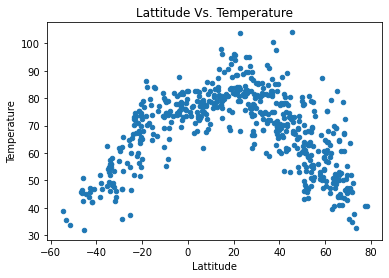

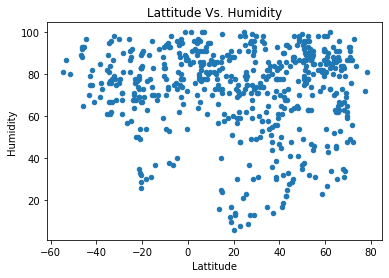

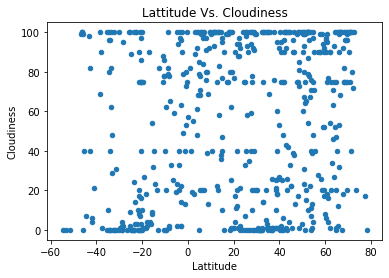

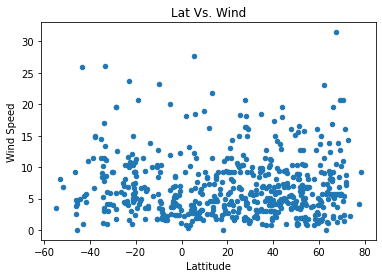

In [6]:
#Temperature Vs. Lattitude
cities_df.plot.scatter(x = 'Lattitude' , y = 'Temperature' , title = 'Lattitude Vs. Temperature')

#Temperature Vs Humidity
cities_df.plot.scatter(x = 'Lattitude' , y = 'Humidity' , title = 'Lattitude Vs. Humidity');

#Lattitude Vs.Cloudiness
cities_df.plot.scatter(x = 'Lattitude' , y = 'Cloudiness' , title = 'Lattitude Vs. Cloudiness');

#Lattitude Vs.Wind Speed
cities_df.plot.scatter(x = 'Lattitude' , y = 'Wind Speed' , title = 'Lat Vs. Wind');

In [6]:
#Subsetting data into Northern and Southern Hemispheres
nh = cities_df[cities_df['Lattitude'] > 0];
sh = cities_df[cities_df['Lattitude'] <0];

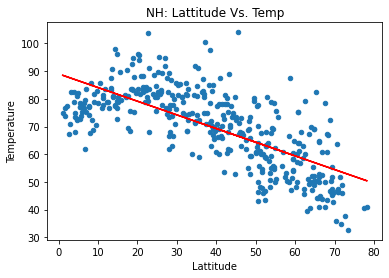

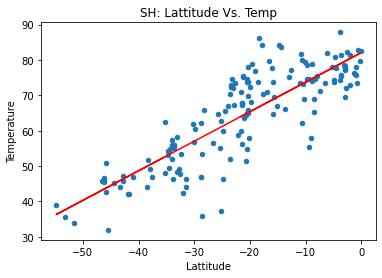

In [7]:
#Performing Linear regression on Lattitude and Temeperature relationship
nh.plot.scatter(x = 'Lattitude' , y = 'Temperature' , title = 'NH: Lattitude Vs. Temp')
(m , b , rval , pval , stderr) = linregress(nh['Lattitude'] , nh['Temperature']);
nh_regress = nh['Lattitude'] * m + b;
plt.plot(nh['Lattitude'] , nh_regress , color='red');

#Southern Hemisphere
sh.plot.scatter(x = 'Lattitude' , y = 'Temperature' , title= 'SH: Lattitude Vs. Temp')
(m_sh , b_sh , rval_sh , pval_sh , stderr_sh) = linregress(sh['Lattitude'] , sh['Temperature']);
sh_regress = sh['Lattitude'] * m_sh + b_sh;
plt.plot(sh['Lattitude'] , sh_regress , color='red')

We are using linear regression to predict a Temperature from a given lattitude for both Hemishperes.
* In the Northern Hemishpere we notice a negative correlation between Lattitude and Temperature , The more North you go the colder it gets , think the north pole!
* In the Southern Hemisphere we notice a positive correlation between Lattitude and Temperature , The more south you go the colder it gets , south pole....
* One thing is for sure , high temperatures are recorded around a Lattitude of 0 , the equator.

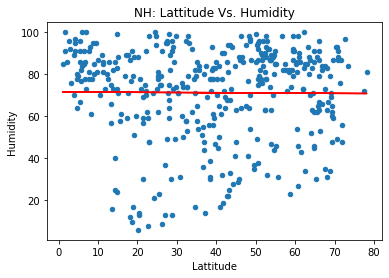

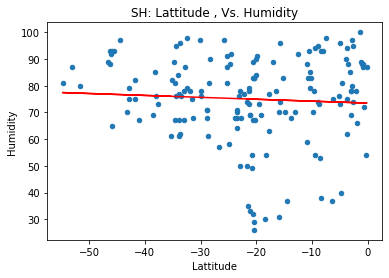

In [8]:
#Lattitude Vs. Humidity (NH , SH)
nh.plot.scatter(x = 'Lattitude' , y = 'Humidity' , title = 'NH: Lattitude Vs. Humidity')
(m_nh_H , b_nh_H , rval_nh_H , pval_nh_H , stderr_nh_H) = linregress(nh['Lattitude'] , nh['Humidity']);
nh_H_regress = nh['Lattitude'] * m_nh_H + b_nh_H;
plt.plot(nh['Lattitude'] , nh_H_regress , color = 'red');

#Southern Hemisphere (SH)
sh.plot.scatter(x = 'Lattitude' , y = 'Humidity' , title = 'SH: Lattitude , Vs. Humidity');
(m_sh_H , b_sh_H , rval_sh_H , pval_sh_H , stderr_sh_H) = linregress(sh['Lattitude'] , sh['Humidity']);
sh_H_regress = sh['Lattitude'] * m_sh_H + b_sh_H;
plt.plot(sh['Lattitude'] , sh_H_regress , color = 'red');

Similar to the linear regression with temperature we are trying to predict Humidity values from a given lattitude
* There does not seem to be any correlation between Lattitude and Humidity for the northern hemisphere
* A weak negative correlation exists for Lattitude and Humidity in the southern hemisphere

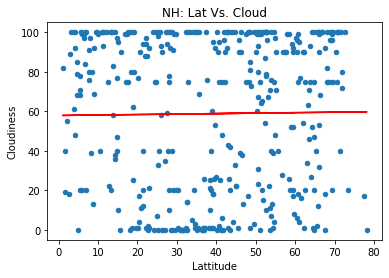

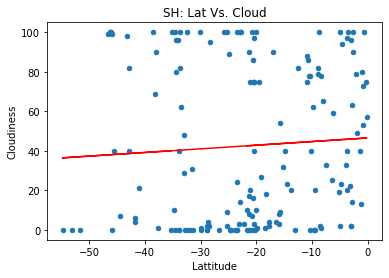

In [9]:
# Lattitude Vs. Cloudiness (NH , SH)
N_clouds = nh['Cloudiness'];
S_clouds = sh['Cloudiness'];

#Northern Hemisphere
nh.plot.scatter(x = 'Lattitude' , y = 'Cloudiness' , title ='NH: Lat Vs. Cloud')
(m_c , b_c , rval_c , pval_c , stderr_c) = linregress(nh['Lattitude'] , N_clouds);
cloud_regress = nh['Lattitude'] * m_c + b_c;
plt.plot(nh['Lattitude'] , cloud_regress , color = 'red');

#Southern Hemisphere
sh.plot.scatter(x = 'Lattitude' , y = 'Cloudiness' , title = 'SH: Lat Vs. Cloud');
(mc2 , bc2 , rvalc2 , pvalc2 , stderrc2) = linregress(sh['Lattitude']  , S_clouds);
sh_cloud_regress = sh['Lattitude'] * mc2 + bc2;
plt.plot(sh['Lattitude'] , sh_cloud_regress , color = 'red')

* Weak positive correlation noted for both hemispheres when we are talking about Lattitude Vs. Cloudiness.
* Our line would not make for good predictive models

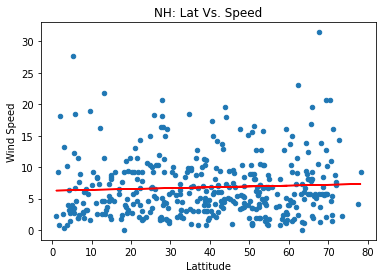

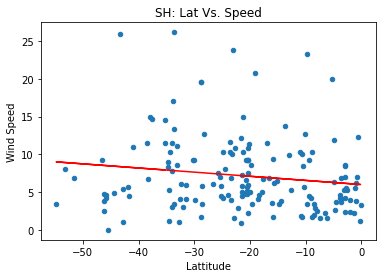

In [12]:
# Lattitude Vs. Wind Speed (NH , SH)
nh.plot.scatter(x = 'Lattitude' , y = 'Wind Speed' , title = 'NH: Lat Vs. Speed');
(ms , bs , rvals , pvals , stderrs) = linregress(nh['Lattitude'] , nh['Wind Speed']);
n_s_regress = nh['Lattitude'] * ms + bs;
plt.plot(nh['Lattitude'] , n_s_regress , color = 'red')

#Southern Hemispheres
sh.plot.scatter(x = 'Lattitude' , y = 'Wind Speed' , title = 'SH: Lat Vs. Speed');
(ms2 , bs2 , rvals2 , pvals2 , stderrs2) = linregress(sh['Lattitude'] , sh['Wind Speed']);
s_s_regress = sh['Lattitude'] * ms2 + bs2;
plt.plot(sh['Lattitude'] , s_s_regress , color = 'red')

Here we are trying to predict wind speeds for a given Lattitude value
* Weak correlations are present for both hemispheres
* Maybe geographical location isnt the only metric that determines wind speed. Maybe cities that are in valleys have or in mountain ranges have higher winds. This is information we cant get from pure geo-coordinates.